In [1]:
from scevonet import net
import seaborn as sns
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

DEBUG:matplotlib:CACHEDIR=/Users/alex/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/alex/.matplotlib/fontlist-v330.json


# Read data: count matrices and cluster lists

You can download test_data [here](https://www.dropbox.com/sh/tt1cgrxp2qu9r0f/AADJhRbiWTwebLhD8dPfAJLCa?dl=0)

In [3]:
gastrulation_df = pd.read_pickle('test_data_12.pkl')
neurulation_df = pd.read_pickle('test_data_20.pkl')

In [4]:
gastrulation_df.head(3)

,BICD2,SFMBT1,YME1L1,XPO1,ZZZ3,SNRPB,LIMA1,LY6G6D,SLC25A3,EIF4A3,...,SLC39A12,MECP2,USP2,CASR-9,Xetrov107019905m.g,ACR-3,WNK4,Xetrov107028764m.g,Xetrov107061280m.g,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12_involuted dorsal mesoderm
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12_goblet cells
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12_involuted dorsal mesoderm


# Generate the cell type models

Two arguments: count matrix and cluster list. For each cluster scEvoNet generates model and saves top important features (genes)

In [5]:
gastrulation_obj = net.Sample(
    matrix=gastrulation_df[[x for x in gastrulation_df if x != 'clusters']],
    cell_types=gastrulation_df['clusters'])

/Users/alex/opt/miniconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/alex/opt/miniconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
INFO:root:Model for 12_non-neural ectoderm is generated
INFO:root:Model for 12_involuted dorsal mesoderm is generated
INFO:root:Model for 12_ionocyte is generated
INFO:root:Model for 12_early neurons is generated
INFO:root:Model for 12_notochord is generated
INFO:root:Mod

In [6]:
neurulation_obj = net.Sample(
    matrix=neurulation_df[[x for x in neurulation_df if x != 'clusters']],
    cell_types=neurulation_df['clusters'])

INFO:root:Model for 20_blood is generated
INFO:root:Model for 20_small secretory cells is generated
INFO:root:Model for 20_phyhd1+/krt19+ is generated
INFO:root:Model for 20_placodal area is generated
INFO:root:Model for 20_somite is generated
INFO:root:Model for 20_neural crest is generated
INFO:root:Model for 20_hand1+/cfb+/pax8+ is generated
INFO:root:Model for 20_neural tube is generated
INFO:root:Model for 20_ciliated epidermal progenitors is generated
INFO:root:Model for 20_dorsal lateral plate region is generated
INFO:root:Model for 20_epidermal progenitor is generated
INFO:root:Model for 20_notochord is generated
INFO:root:Model for 20_presomitic mesoderm is generated


# Predict cell types similarity with generated models

In [7]:
gastrulation_vs_neurulation = net.EvoManager(gastrulation_obj, neurulation_obj)

INFO:root:Running 1 out of 4
/Users/alex/opt/miniconda3/lib/python3.9/site-packages/scevonet/net.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = list(matrix[i])
INFO:root:Running 2 out of 4
/Users/alex/opt/miniconda3/lib/python3.9/site-packages/scevonet/net.py:96: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = [float('NaN')] * matrix.shape[0]
INFO:root:Running 3 out of 4
INFO:root:Running 4 out of 4


## Get comparison df

In [8]:
comparison_df = gastrulation_vs_neurulation.generate_comparison_df()

__Get clustermap for df.T as we want to see correlations of predctions results of the multiple models__


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fc6e2e61670>


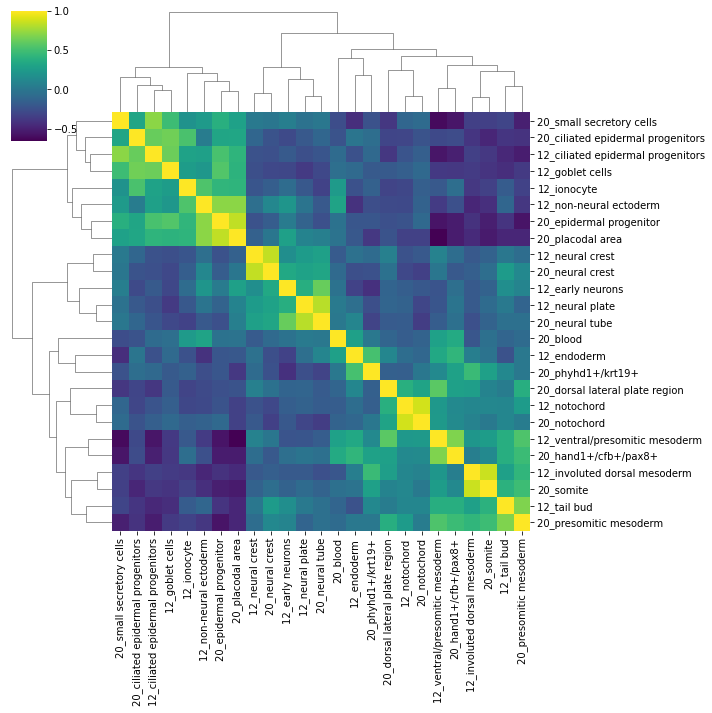

In [41]:
sns.clustermap(comparison_df.T.corr(), yticklabels=True, figsize=(10, 10),cmap='viridis')

To study what genes connect cell types and that are the possible co-opted genes you can generate subnetwork from the short paths from one cell type to another cell type

__closets_clusters__ argument controls how many similar cell types (from the __comparison_df__) are involved into generation of the subnetwork

argument __number_of_short_paths__ controls the size of the subnetwork

In [16]:
subnetwork = gastrulation_vs_neurulation.generate_cell_type_network(
                              '20_neural crest',
                              '12_neural crest',
                              number_of_shortest_paths=50,closest_clusters=20)

Now you can plot the subnetwork

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved


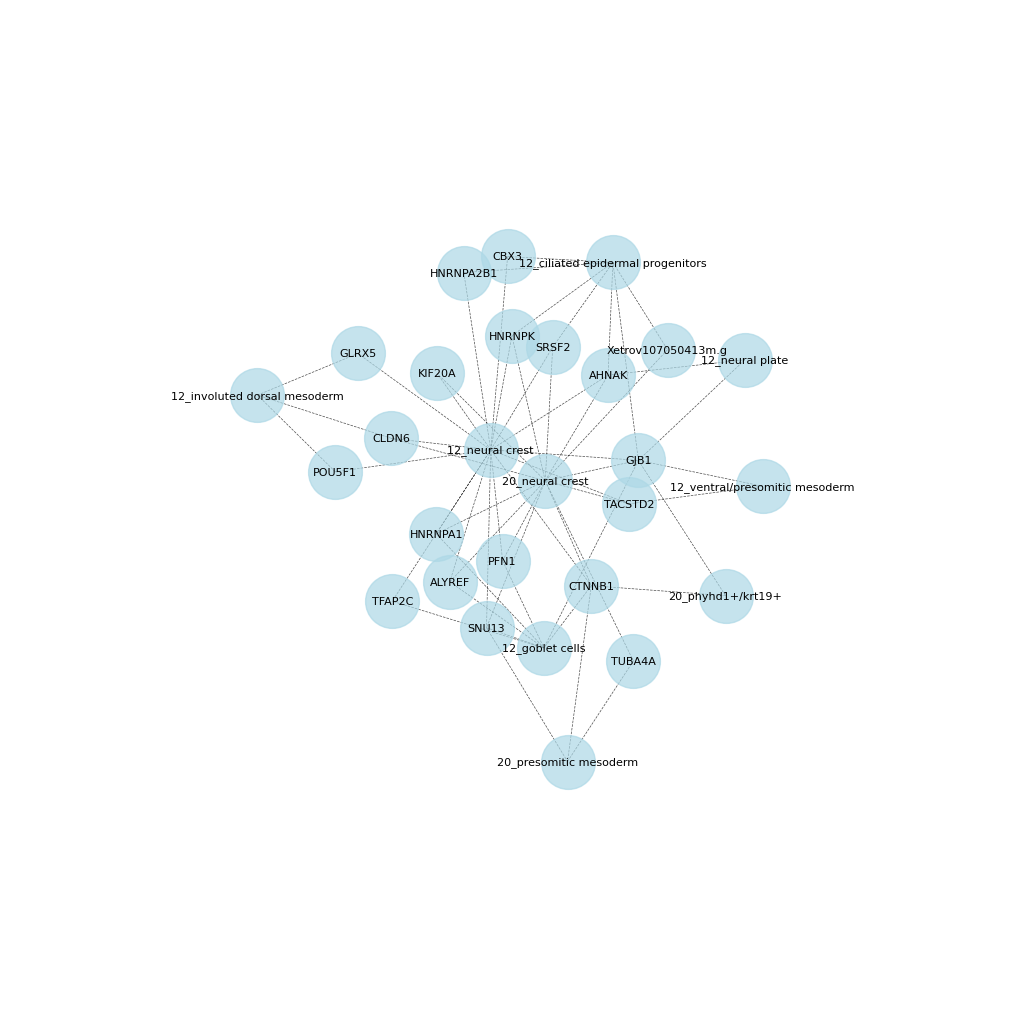

In [30]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(10, 10))
net.draw_net(subnetwork, subnetwork.nodes)

You can also get subnetwork in the form of the dataframe with argument *net=False*

In [19]:
subnetwork = gastrulation_vs_neurulation.generate_cell_type_network(
                              '20_neural crest',
                              '12_neural crest',
                              number_of_shortest_paths=50,closest_clusters=20, net=False)
subnetwork.head()

,in,out,importance
0,20_neural crest,C3,28
1,C3,12_neural crest,49
2,20_neural crest,TFAP2C,4
3,TFAP2C,12_neural crest,41
4,20_neural crest,SNAI2-1,28


To get only direct connections (with one gene between two cell types) you can specify __get_only_direct__ argument


In [31]:
subnetwork = gastrulation_vs_neurulation.generate_cell_type_network(
                              '20_neural crest',
                              '12_neural crest',
                              number_of_shortest_paths=50,
                              closest_clusters=20, get_only_direct=True)

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved


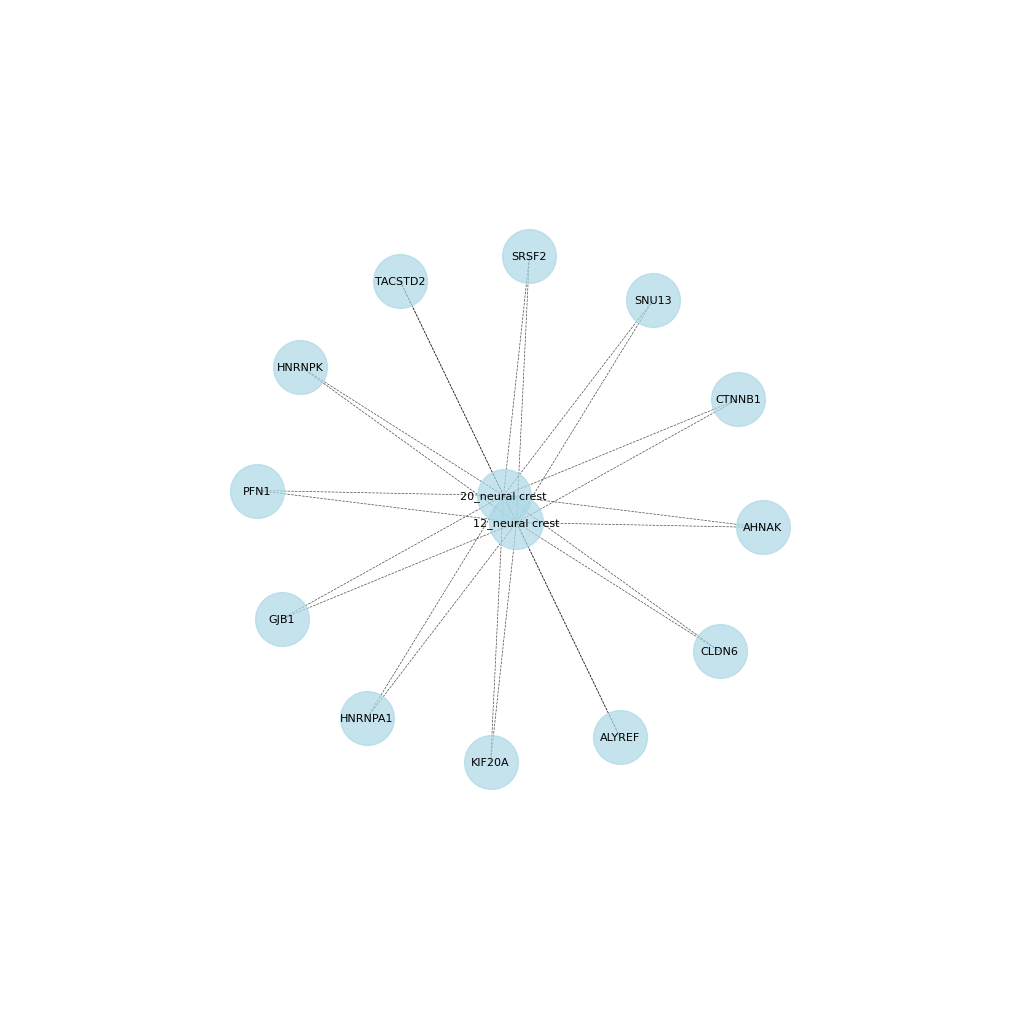

In [32]:
plt.figure(figsize=(10, 10))
net.draw_net(subnetwork, subnetwork.nodes)